**Булыгин Олег**:
* [LinkedIn](linkedin.com/in/obulygin)
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

# Рекомендательной система книг на примере работ Дарвина

In [ ]:
# импорт библиотек
import glob
import pandas as pd
import re

In [ ]:
# считаем все файлы, которые хранятся в папке (книги)
book_files = glob.glob('*.txt')
book_files

['GeologicalObservationsSouthAmerica.txt',
 'DescentofMan.txt',
 'Autobiography.txt',
 'OriginofSpecies.txt',
 'MovementClimbingPlants.txt',
 'LifeandLettersVol2.txt',
 'EffectsCrossSelfFertilization.txt',
 'LifeandLettersVol1.txt',
 'VariationPlantsAnimalsDomestication.txt',
 'FoundationsOriginofSpecies.txt',
 'InsectivorousPlants.txt',
 'MonographCirripedia.txt',
 'ExpressionofEmotionManAnimals.txt',
 'VoyageBeagle.txt',
 'FormationVegetableMould.txt',
 'PowerMovementPlants.txt',
 'VolcanicIslands.txt',
 'MonographCirripediaVol2.txt',
 'DifferentFormsofFlowers.txt',
 'CoralReefs.txt']

In [ ]:
# создадим список названий книг и список текстов книг
texts = []
titles = []

for f in book_files:
    with open(f) as f_:
        text = f_.read()
        title = f[:-4]
        texts.append(text)
        titles.append(title)

In [ ]:
print(titles)

['GeologicalObservationsSouthAmerica', 'DescentofMan', 'Autobiography', 'OriginofSpecies', 'MovementClimbingPlants', 'LifeandLettersVol2', 'EffectsCrossSelfFertilization', 'LifeandLettersVol1', 'VariationPlantsAnimalsDomestication', 'FoundationsOriginofSpecies', 'InsectivorousPlants', 'MonographCirripedia', 'ExpressionofEmotionManAnimals', 'VoyageBeagle', 'FormationVegetableMould', 'PowerMovementPlants', 'VolcanicIslands', 'MonographCirripediaVol2', 'DifferentFormsofFlowers', 'CoralReefs']


In [ ]:
# Предположим, нам очень понравилась книга "Происхождение видов".
# Какую книгу из всего списка, нам прочитать следующей, которая может понравится?
# Какие тексты могут считаться похожими?
texts[3]

'\n\n\nON THE\n\nORIGIN OF SPECIES.\n\n       *       *       *       *       *\n\n"But with regard to the material world, we can at least go so far as\nthis--we can perceive that events are brought about not by insulated\ninterpositions of Divine power, exerted in each particular case, but by the\nestablishment of general laws."\n\nWHEWELL: _Bridgewater Treatise_.\n\n"The only distinct meaning of the word \'natural\' is _stated_, _fixed_, or\n_settled_; since what is natural as much requires and presupposes an\nintelligent agent to render it so, _i.e._ to effect it continually or at\nstated times, as what is supernatural or miraculous does to effect it for\nonce."\n\nBUTLER: _Analogy of Revealed Religion_.\n\n"To conclude, therefore, let no man out of a weak conceit of sobriety, or\nan ill-applied moderation, think or maintain, that a man can search too far\nor be too well studied in the book of God\'s word, or in the book of God\'s\nworks; divinity or philosophy; but rather let men e

In [ ]:
# приведем все слова к нижнему регистру
texts_lower_case = [text.lower() for text in texts]
# проверим
texts_lower_case[3]

'\n\n\non the\n\norigin of species.\n\n       *       *       *       *       *\n\n"but with regard to the material world, we can at least go so far as\nthis--we can perceive that events are brought about not by insulated\ninterpositions of divine power, exerted in each particular case, but by the\nestablishment of general laws."\n\nwhewell: _bridgewater treatise_.\n\n"the only distinct meaning of the word \'natural\' is _stated_, _fixed_, or\n_settled_; since what is natural as much requires and presupposes an\nintelligent agent to render it so, _i.e._ to effect it continually or at\nstated times, as what is supernatural or miraculous does to effect it for\nonce."\n\nbutler: _analogy of revealed religion_.\n\n"to conclude, therefore, let no man out of a weak conceit of sobriety, or\nan ill-applied moderation, think or maintain, that a man can search too far\nor be too well studied in the book of god\'s word, or in the book of god\'s\nworks; divinity or philosophy; but rather let men e

In [ ]:
# уберем все служебные символы
print(len(texts_lower_case[3]))
only_words_text = [re.sub('[\W_]+', ' ', text) for text in texts_lower_case]
# проверим
print(len(only_words_text[3]))
only_words_text[3]

945712
916267


' on the origin of species but with regard to the material world we can at least go so far as this we can perceive that events are brought about not by insulated interpositions of divine power exerted in each particular case but by the establishment of general laws whewell bridgewater treatise the only distinct meaning of the word natural is stated fixed or settled since what is natural as much requires and presupposes an intelligent agent to render it so i e to effect it continually or at stated times as what is supernatural or miraculous does to effect it for once butler analogy of revealed religion to conclude therefore let no man out of a weak conceit of sobriety or an ill applied moderation think or maintain that a man can search too far or be too well studied in the book of god s word or in the book of god s works divinity or philosophy but rather let men endeavour an endless progress or proficience in both bacon advancement of learning down bromley kent october 1st 1859 1st thou

In [ ]:
# разделим все на слова
texts_splitted = [text.split() for text in only_words_text]
# сколько слов?
len(texts_splitted[3])
# texts_splitted[-2]

158395

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
without_sw = [[word for word in text if word not in stopwords_set] for text in texts_splitted]
len(without_sw[3])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


79994

In [ ]:
without_sw[3]

['origin',
 'species',
 'regard',
 'material',
 'world',
 'least',
 'go',
 'far',
 'perceive',
 'events',
 'brought',
 'insulated',
 'interpositions',
 'divine',
 'power',
 'exerted',
 'particular',
 'case',
 'establishment',
 'general',
 'laws',
 'whewell',
 'bridgewater',
 'treatise',
 'distinct',
 'meaning',
 'word',
 'natural',
 'stated',
 'fixed',
 'settled',
 'since',
 'natural',
 'much',
 'requires',
 'presupposes',
 'intelligent',
 'agent',
 'render',
 'e',
 'effect',
 'continually',
 'stated',
 'times',
 'supernatural',
 'miraculous',
 'effect',
 'butler',
 'analogy',
 'revealed',
 'religion',
 'conclude',
 'therefore',
 'let',
 'man',
 'weak',
 'conceit',
 'sobriety',
 'ill',
 'applied',
 'moderation',
 'think',
 'maintain',
 'man',
 'search',
 'far',
 'well',
 'studied',
 'book',
 'god',
 'word',
 'book',
 'god',
 'works',
 'divinity',
 'philosophy',
 'rather',
 'let',
 'men',
 'endeavour',
 'endless',
 'progress',
 'proficience',
 'bacon',
 'advancement',
 'learning',
 'bro

Произведем лемматизацию

Лемматизация — процесс приведения словоформы к лемме — её нормальной (словарной) форме.
В русском языке:
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве несовершенного вида.

В других языках – по аналогии.

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]
lemmatized_text[3]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


['origin',
 'specie',
 'regard',
 'material',
 'world',
 'least',
 'go',
 'far',
 'perceive',
 'event',
 'brought',
 'insulated',
 'interposition',
 'divine',
 'power',
 'exerted',
 'particular',
 'case',
 'establishment',
 'general',
 'law',
 'whewell',
 'bridgewater',
 'treatise',
 'distinct',
 'meaning',
 'word',
 'natural',
 'stated',
 'fixed',
 'settled',
 'since',
 'natural',
 'much',
 'requires',
 'presupposes',
 'intelligent',
 'agent',
 'render',
 'e',
 'effect',
 'continually',
 'stated',
 'time',
 'supernatural',
 'miraculous',
 'effect',
 'butler',
 'analogy',
 'revealed',
 'religion',
 'conclude',
 'therefore',
 'let',
 'man',
 'weak',
 'conceit',
 'sobriety',
 'ill',
 'applied',
 'moderation',
 'think',
 'maintain',
 'man',
 'search',
 'far',
 'well',
 'studied',
 'book',
 'god',
 'word',
 'book',
 'god',
 'work',
 'divinity',
 'philosophy',
 'rather',
 'let',
 'men',
 'endeavour',
 'endless',
 'progress',
 'proficience',
 'bacon',
 'advancement',
 'learning',
 'bromley',

In [ ]:
# https://www.machinelearningplus.com/nlp/gensim-tutorial/
# библиотека gensim позволяет эффективно работать с корпусами текстов
from gensim import corpora

# создадим словарь, в котором присвоем каждому словую свой уникальный id
dictionary = corpora.Dictionary(lemmatized_text)
dict(dictionary)

{0: '0',
 1: '00',
 2: '000',
 3: '075',
 4: '1',
 5: '10',
 6: '100',
 7: '101',
 8: '102',
 9: '105',
 10: '108',
 11: '109',
 12: '10th',
 13: '11',
 14: '110',
 15: '112',
 16: '116',
 17: '11th',
 18: '12',
 19: '120',
 20: '122',
 21: '12th',
 22: '13',
 23: '130',
 24: '131',
 25: '133',
 26: '135',
 27: '13th',
 28: '14',
 29: '140',
 30: '144',
 31: '146',
 32: '149',
 33: '14th',
 34: '15',
 35: '150',
 36: '151',
 37: '1530',
 38: '155',
 39: '157',
 40: '1586',
 41: '15th',
 42: '16',
 43: '160',
 44: '161',
 45: '1614',
 46: '162',
 47: '163',
 48: '164',
 49: '1643',
 50: '166',
 51: '168',
 52: '1680',
 53: '169',
 54: '16th',
 55: '17',
 56: '170',
 57: '171',
 58: '1710',
 59: '1713',
 60: '1726',
 61: '173',
 62: '1746',
 63: '175',
 64: '1762',
 65: '178',
 66: '1783',
 67: '179',
 68: '17th',
 69: '18',
 70: '180',
 71: '181',
 72: '1817',
 73: '1819',
 74: '182',
 75: '1822',
 76: '1824',
 77: '1829',
 78: '183',
 79: '1830',
 80: '1831',
 81: '1832',
 82: '1833',


In [ ]:
len(dict(dictionary))

36342

Создадим на основе словаря модель [bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model), которая присваивает каждому слову (id) количество его вхождений в конкретном документе

In [ ]:
bows = [dictionary.doc2bow(text) for text in lemmatized_text]
dict(bows[3])

{2: 2,
 4: 11,
 5: 11,
 6: 7,
 7: 3,
 8: 5,
 9: 1,
 10: 1,
 11: 2,
 13: 9,
 14: 2,
 15: 2,
 16: 5,
 18: 12,
 19: 1,
 20: 1,
 22: 2,
 23: 2,
 24: 4,
 25: 4,
 26: 10,
 28: 51,
 29: 4,
 30: 12,
 31: 5,
 32: 4,
 34: 1,
 35: 5,
 36: 1,
 38: 2,
 39: 2,
 42: 2,
 43: 3,
 44: 3,
 46: 3,
 47: 8,
 48: 2,
 50: 1,
 51: 1,
 53: 1,
 55: 2,
 56: 2,
 57: 2,
 61: 1,
 63: 3,
 65: 1,
 67: 3,
 69: 10,
 70: 4,
 71: 2,
 74: 7,
 78: 3,
 85: 1,
 87: 2,
 88: 7,
 93: 2,
 94: 3,
 96: 11,
 98: 1,
 100: 2,
 101: 1,
 103: 2,
 104: 8,
 105: 6,
 106: 3,
 107: 7,
 108: 3,
 110: 2,
 111: 7,
 112: 5,
 113: 2,
 114: 1,
 116: 1,
 117: 3,
 118: 5,
 119: 5,
 120: 3,
 122: 2,
 123: 1,
 124: 1,
 125: 1,
 127: 3,
 128: 2,
 129: 1,
 130: 4,
 132: 1,
 133: 6,
 134: 1,
 135: 3,
 136: 3,
 138: 3,
 139: 4,
 140: 3,
 141: 3,
 142: 9,
 144: 1,
 145: 3,
 146: 3,
 148: 1,
 149: 2,
 150: 1,
 152: 6,
 153: 1,
 154: 6,
 155: 4,
 156: 3,
 157: 1,
 158: 2,
 159: 3,
 160: 1,
 162: 4,
 163: 3,
 164: 5,
 165: 5,
 166: 1,
 167: 6,
 168: 6,
 169:

In [ ]:
# для примера посмотрим на bow в виде датафрейма для книги "Происхождене видов"
bow_oos = pd.DataFrame(bows[3])
bow_oos.columns = ['index', 'occurrences']
bow_oos
# почему здесь не все индексы?

index  occurrences
0         2            2
1         4           11
2         5           11
3         6            7
4         7            3
...     ...          ...
6544  17062            1
6545  17063            1
6546  17064            3
6547  17065            1
6548  17066            1

[6549 rows x 2 columns]

In [ ]:
# смэтчим индексы с реальными словами
bow_oos['word'] = [dictionary[index] for index in bow_oos['index']]
bow_oos.sort_values('occurrences', ascending=False)

index  occurrences        word
2510   4823         1543      specie
1930   3691          657         one
2849   5489          516     variety
1278   2372          515        form
1763   3341          510         may
...     ...          ...         ...
4916  13840            1  straggling
4914  13837            1       stork
2550   4906            1      strait
2559   4922            1     strewed
6548  17066            1  æstivation

[6549 rows x 3 columns]

Создадим модель [TF-IDF](https://ru.wikipedia.org/wiki/TF-IDF) (term frequency-inverse document frequency – частотность терминов-обратная частотность документов)

Если слово встречается в каком-либо документе часто, при этом встречаясь редко во всех остальных документах — это слово имеет большую значимость для исходного документа.

In [ ]:
from gensim.models import TfidfModel
tfidf = TfidfModel(bows)

# посмотрим, как это выглядит на "Происхождение видов"
dict(tfidf[bows[3]])

# а почему здесь не все индексы?

{2: 0.0008497989148279142,
 5: 0.0010743730709883333,
 6: 0.002166226323345829,
 7: 0.0024608297156633553,
 8: 0.004863450659743397,
 9: 0.0005477906745347223,
 10: 0.0008202765718877852,
 11: 0.0016405531437755703,
 13: 0.000879032512626818,
 14: 0.0008497989148279142,
 15: 0.0013583273122629576,
 16: 0.004101382859438926,
 18: 0.0011720433501690908,
 19: 0.0002006225394917534,
 20: 0.0008202765718877852,
 22: 0.00019534055836151513,
 23: 0.0008497989148279142,
 24: 0.002716654624525915,
 25: 0.002191162698138889,
 26: 0.008202765718877852,
 29: 0.002716654624525915,
 30: 0.009843318862653421,
 31: 0.004101382859438926,
 32: 0.002716654624525915,
 35: 0.0033958182806573937,
 36: 0.0005477906745347223,
 38: 0.001945380263897359,
 39: 0.0013583273122629576,
 42: 0.00019534055836151513,
 43: 0.0016433720236041667,
 44: 0.0029180703958460387,
 46: 0.0034151193132894433,
 47: 0.007781521055589436,
 48: 0.001945380263897359,
 50: 0.0009726901319486795,
 51: 0.0005477906745347223,
 53: 0.000

Теперь каждый наш текст представлен по-сути вектором чисел. Сходство между ними мы можем определить при помощи [косинусного сходства](https://www.machinelearningplus.com/nlp/cosine-similarity/) между соответствующими векторами.

In [ ]:
from gensim import similarities
cos_sim = similarities.MatrixSimilarity(tfidf[bows])
# преобразуем в датафрейм
cos_sim_df = pd.DataFrame(list(cos_sim))
# добавним название текстов
cos_sim_df.columns = titles
cos_sim_df.index = titles
cos_sim_df

GeologicalObservationsSouthAmerica  \
GeologicalObservationsSouthAmerica                             1.000000   
DescentofMan                                                   0.010329   
Autobiography                                                  0.028217   
OriginofSpecies                                                0.054994   
MovementClimbingPlants                                         0.002333   
LifeandLettersVol2                                             0.016848   
EffectsCrossSelfFertilization                                  0.002047   
LifeandLettersVol1                                             0.039469   
VariationPlantsAnimalsDomestication                            0.013786   
FoundationsOriginofSpecies                                     0.028426   
InsectivorousPlants                                            0.007598   
MonographCirripedia                                            0.009012   
ExpressionofEmotionManAnimals                                  0.005932   
VoyageBeagle                                                   0.242660   
FormationVegetableMould                                        0.037423   
PowerMovementPlants                                            0.004504   
VolcanicIslands                                                0.385193   
MonographCirripediaVol2                                        0.022361   
DifferentFormsofFlowers                                        0.001029   
CoralReefs                                                     0.060472   

                                     DescentofMan  Autobiography  \
GeologicalObservationsSouthAmerica       0.010329       0.028217   
DescentofMan                             1.000000       0.072395   
Autobiography                            0.072395       1.000000   
OriginofSpecies                          0.258965       0.088372   
MovementClimbingPlants                   0.005745       0.015132   
LifeandLettersVol2                       0.125322       0.270213   
EffectsCrossSelfFertilization            0.026325       0.039544   
LifeandLettersVol1                       0.085339       0.508835   
VariationPlantsAnimalsDomestication      0.219339       0.040736   
FoundationsOriginofSpecies               0.128107       0.054001   
InsectivorousPlants                      0.009282       0.014682   
MonographCirripedia                      0.049710       0.005000   
ExpressionofEmotionManAnimals            0.150429       0.074814   
VoyageBeagle                             0.118546       0.159396   
FormationVegetableMould                  0.018327       0.022022   
PowerMovementPlants                      0.012894       0.013754   
VolcanicIslands                          0.009154       0.037590   
MonographCirripediaVol2                  0.040959       0.007835   
DifferentFormsofFlowers                  0.028440       0.018233   
CoralReefs                               0.009909       0.044893   

                                     OriginofSpecies  MovementClimbingPlants  \
GeologicalObservationsSouthAmerica          0.054994                0.002333   
DescentofMan                                0.258965                0.005745   
Autobiography                               0.088372                0.015132   
OriginofSpecies                             1.000000                0.009441   
MovementClimbingPlants                      0.009441                0.999999   
LifeandLettersVol2                          0.142723                0.028074   
EffectsCrossSelfFertilization               0.119832                0.012943   
LifeandLettersVol1                          0.135738                0.007722   
VariationPlantsAnimalsDomestication         0.394684                0.012259   
FoundationsOriginofSpecies                  0.310112                0.004118   
InsectivorousPlants                         0.013378                0.246779   
MonographCirripedia                         0.030554                0.01

Text(0.5, 1.0, 'Сходство книг относительно "Происхождение видов"')

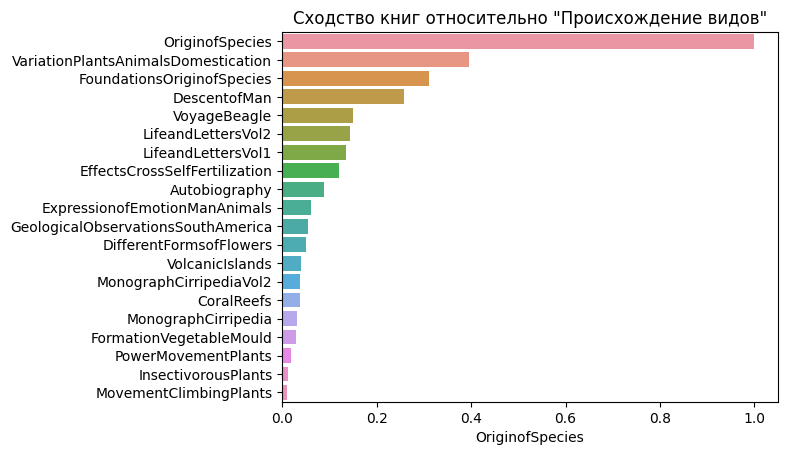

In [ ]:
import seaborn as sns

cos_sim_oos = cos_sim_df[['OriginofSpecies']].sort_values('OriginofSpecies', ascending=False)

ax = sns.barplot(y=cos_sim_oos.index, x=cos_sim_oos.OriginofSpecies, orient='h')
ax.set_title('Сходство книг относительно "Происхождение видов"')

Проведем кластеризацию книг при помощи [метода Уорда](https://neerc.ifmo.ru/wiki/index.php?title=%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F).
Метод Уорда основан на объединении не максимально близких кластеров, а тех,слияние которых дает наименьший прирост внутрикластерной дисперсии. Этот метод применяется для задач с близко расположенными кластерами.

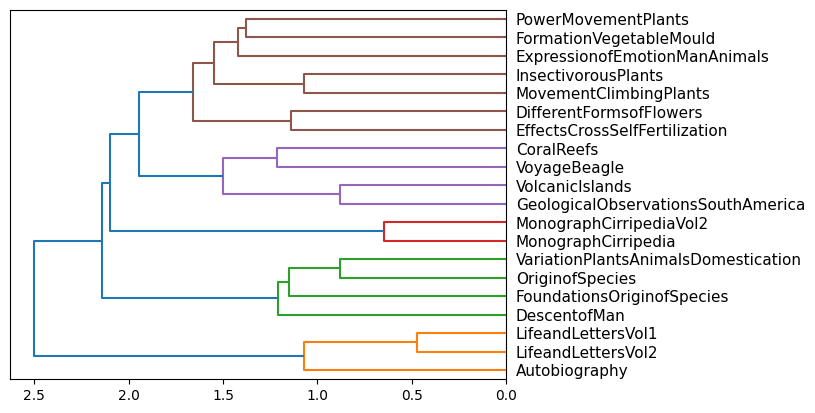

In [ ]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(cos_sim_df, method='ward')

dendrogram = hierarchy.dendrogram(clusters,
                                  leaf_font_size=11,
                                  labels=list(cos_sim_df.index),
                                  orientation="left")